<center>
<div> 
<h1>
AmirKabir university of technology
</h1>
</div>
<h1>
Computer engineering department
</h1>
</div>
<h2>
4th project of Applied linear algebra
</h2>
</div>
<h2>
Course instructor: Dr. Nazerfard
</h2>
</div>
<h2>
Project designer: AmirMohammad Jafari
</h2>
</div>
</div>
</center>

### Understanding Covariance Matrix in 2D Gaussian Distribution

#### Objective:
1. **Generation and Analysis:** 
    - Generate a 2D Gaussian distribution along the X and Y axes independently, creating 10,000 points for each axis.
    - Utilize the `numpy` library to create random points with Gaussian distribution for both axes.
    - Calculate the covariance matrix for the generated dataset.
    - Plot the generated points to visualize the distribution in a 2D space using `matplotlib`.
  
#### Intuition Explanation:
1. Upon obtaining the covariance matrix, articulate your understanding of its significance within the context of the generated Gaussian distribution.
2. Explain the meaning of the matrix's diagonal and off-diagonal elements. Discuss their implications for the relationship between the X and Y variables.


Covariance Matrix:
[[0.99249389 0.01944702]
 [0.01944702 1.04446128]]


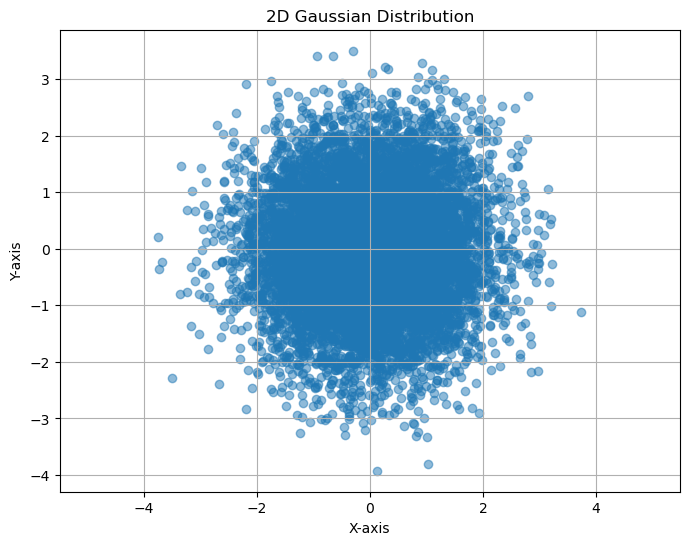

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set mean and standard deviation for x and y axes
mean_x, mean_y = 0, 0
std_dev_x, std_dev_y = 1, 1  # Adjust these values for desired spread

# Generate random points with Gaussian distribution
num_points = 10000  # Number of points to generate
x = np.random.normal(mean_x, std_dev_x, num_points)
y = np.random.normal(mean_y, std_dev_y, num_points)

# Calculate the covariance matrix
data = np.vstack((x, y))  # Combine x and y into a 2xN matrix
cov_matrix = np.cov(data)

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.axis('equal')
plt.title('2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

### Transformation of Gaussian Distribution using Matrix [[2, 0], [0, 3]]

#### Objective:
1. **Transformation and Observation:** 
    - Apply a matrix transformation to the previously generated Gaussian distribution using [[2, 0], [0, 3]].
    - Plot the transformed distribution to observe changes in its characteristics.

#### Reasoning and Intuition:
1. Explain the expected effects of applying the transformation matrix to the Gaussian distribution.
2. Discuss how this specific matrix influences the scaling and orientation of the distribution, providing insights into the resulting plot.


Covariance Matrix:
[[3.96997554 0.11668215]
 [0.11668215 9.40015151]]


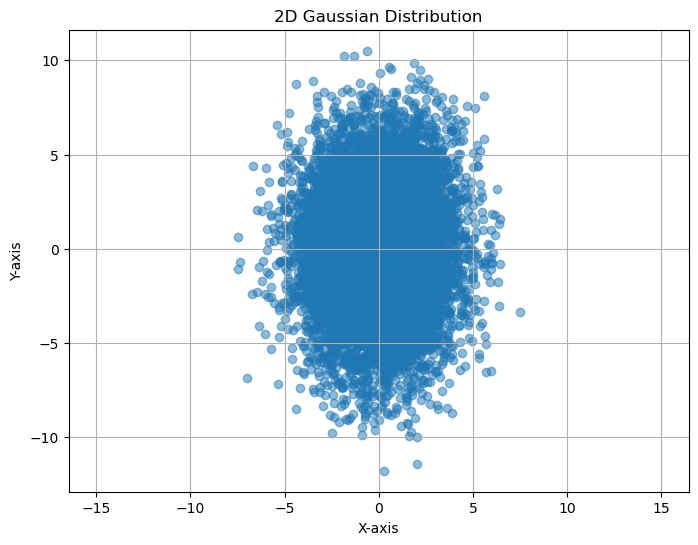

In [3]:
new_mtx = np.array([[2, 0], 
                    [0, 3]])
x_new, y_new = new_mtx @ np.vstack((x, y))
data = np.vstack((x_new, y_new))  # Combine x and y into a 2xN matrix
cov_matrix = np.cov(data)
print("Covariance Matrix:")
print(cov_matrix)
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, alpha=0.5)
plt.axis('equal')
plt.title('2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

### Further Transformation of Gaussian Distribution using Matrix [[2, 1], [1, 3]]

#### Objective:
1. **Application of Additional Transformation:** 
    - Apply a new matrix transformation to the existing Gaussian distribution using [[2, 1], [1, 3]].
    - Plot the distribution resulting from this transformation to visualize its alterations.
  
#### Reasoning and Intuition:
1. Explain the anticipated effects of this new transformation matrix on the Gaussian distribution.
2. Discuss how the matrix [[2, 1], [1, 3]] might alter the distribution's characteristics compared to the previous transformations.


Covariance Matrix:
[[ 5.09222492  5.25450078]
 [ 5.25450078 10.50932755]]


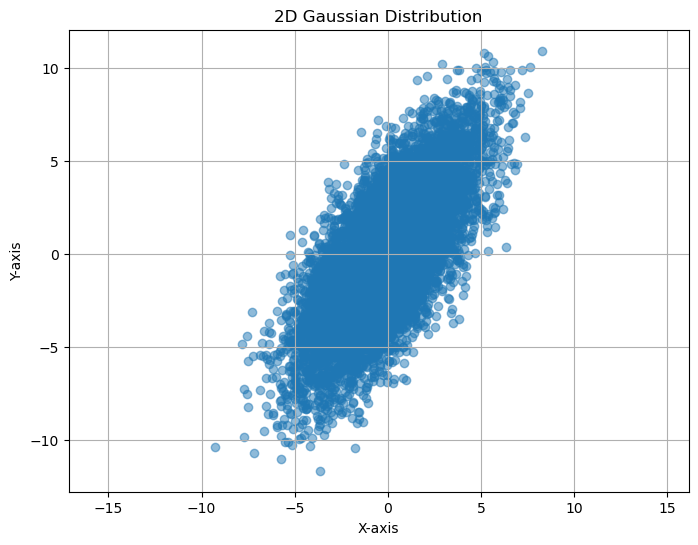

In [4]:
new_mtx = np.array([[2, 1], 
                    [1, 3]])
x_new, y_new = new_mtx @ np.vstack((x, y))
data = np.vstack((x_new, y_new))  # Combine x and y into a 2xN matrix
cov_matrix = np.cov(data)
print("Covariance Matrix:")
print(cov_matrix)
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, alpha=0.5)
plt.axis('equal')
plt.title('2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

### Visualizing Eigenvectors and Eigenvalues of the Covariance Matrix

#### Objective:
1. **Eigenvectors and Eigenvalues Visualization:** 
    - Visualize the eigenvectors and eigenvalues obtained from the covariance matrix of the transformed Gaussian distribution.
    - Represent scaled eigenvectors as arrows originating from the origin (0, 0) and indicate their corresponding eigenvalues on a 2D plot.
  
#### Interpretation and Analysis:
1. Discuss the significance of eigenvectors and eigenvalues concerning the covariance matrix of the transformed Gaussian distribution.
2. Explain how the directions and lengths (scaled by eigenvalues) of eigenvectors relate to the spread and orientation of the distribution, connecting this information to the plotted representation.


Eigenvalues:
[ 1.88925962 13.71229285]

Eigenvectors:
[[-0.8538683  -0.52048913]
 [ 0.52048913 -0.8538683 ]]


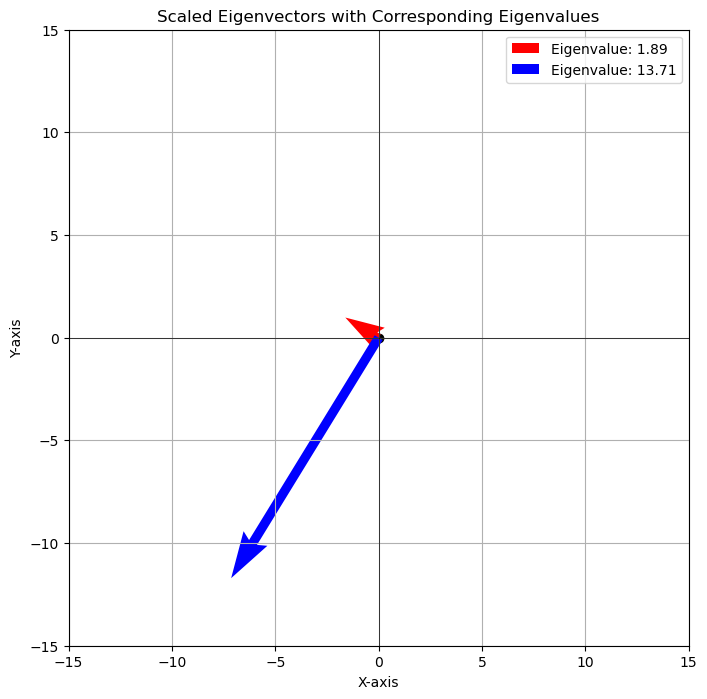

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
# Colors for eigenvectors
colors = ['red', 'blue']  # Define colors for each eigenvector

# Create a 2D plot
plt.figure(figsize=(8, 8))
plt.scatter([0], [0], color='black')  # Origin point

# Plot scaled eigenvectors with corresponding eigenvalues and different colors
for i in range(len(eigenvalues)):
    eigenvec = eigenvectors[:, i]
    eigenval = eigenvalues[i]
    scaled_eigenvec = eigenval * eigenvec  # Scale eigenvector by eigenvalue
    plt.quiver(0, 0, scaled_eigenvec[0], scaled_eigenvec[1], angles='xy', scale_units='xy', scale=1,
               color=colors[i], label=f"Eigenvalue: {eigenval:.2f}", width=0.015)

# Set plot limits
plt.xlim(-15, 15)
plt.ylim(-15, 15)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scaled Eigenvectors with Corresponding Eigenvalues')

# Add legend
plt.legend()

# Show plot
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

### Projection onto Dominant Eigenvector

#### Objective:
1. **Projection onto Dominant Eigenvector:** 
    - Project the transformed Gaussian distribution onto its largest eigenvector.
    - Visualize the original dataset alongside the projected points onto the dominant eigenvector.

#### Interpretation:
1. Discuss the significance of projecting data onto the dominant eigenvector of the covariance matrix.
2. Explain how this process helps capture the maximum variance in the data and illustrate its impact on the original distribution in comparison to the projected points.


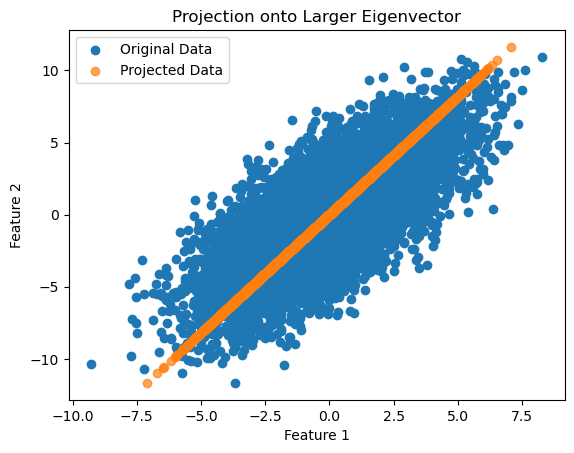

In [6]:
# Get the index of the larger eigenvalue
largest_eigenvalue_index = np.argmax(eigenvalues)
largest_eigenvector = eigenvectors[:, largest_eigenvalue_index]

# Project data onto the larger eigenvector
projected_data = np.dot(data.T, largest_eigenvector).reshape(-1, 1) * largest_eigenvector.reshape(1, -1)

# Plot the original data and the projected points
plt.scatter(data[0], data[1], label='Original Data')
plt.scatter(projected_data[:, 0], projected_data[:, 1], label='Projected Data', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Projection onto Larger Eigenvector')
plt.show()